# import libraries and packages

In [ ]:

# NLTk
import nltk
from nltk.corpus import stopwords
from nltk import bigrams
from nltk.stem import PorterStemmer

#####
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
import random
from nltk.corpus import movie_reviews
import pickle
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
from statistics import mode

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [ ]:
import tweepy
import csv 
import pylab as P 
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#!pip install textblob
from textblob import TextBlob
import re
import pandas as pd
import sys
import spacy
import nltk
import warnings
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime
import collections, re
import time

# load data from local 

In [ ]:
import pickle
def load_dataset(dataset_path):
  with open(dataset_path, 'rb') as reader:
      data = pickle.load(reader)


  return (data)

from google.colab import drive
drive.mount('/content/drive')

path11 = "/content/drive/My Drive/ANR-DISCRET/freqtweetsmai.pkl"
data20 = load_dataset(path11)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'\npath1 = "/content/drive/My Drive/ANR-DISCRET/keywordpolice.pkl"\ndata1 = load_dataset(path1)\n\npath2 = "/content/drive/My Drive/ANR-DISCRET/keywordattaque.pkl"\ndata2 = load_dataset(path2)\n\npath3 = "/content/drive/My Drive/ANR-DISCRET/keywordterroriste.pkl"\ndata3 = load_dataset(path3)'

In [ ]:
data20['created_at'] =pd.to_datetime(data20.created_at)
data2 = data20.sort_values(by='created_at')
data2


,created_at,count
0,2021-04-30 17:02:19+00:00,1
1,2021-04-30 17:03:42+00:00,9
2,2021-04-30 17:03:59+00:00,3
3,2021-04-30 17:12:44+00:00,4
4,2021-04-30 17:23:36+00:00,3
...,...,...
329151,2021-05-29 12:28:36+00:00,4
329152,2021-05-29 12:33:11+00:00,5
329153,2021-05-29 12:33:20+00:00,6
329154,2021-05-29 12:36:56+00:00,3


In [ ]:
data2['time'] = data2['created_at'].dt.round('30min')

aggregation = {'Nombre de tweets': ("count" ,'sum')}
df_freq = data2.groupby(['time']).agg(**aggregation).reset_index()


import plotly.express as px

fig = px.line(df_freq, x="time", y="Nombre de tweets")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ))
)

fig.show()
#df_sentiment_by_time


# ARIMA 



In [ ]:
pip install git+https://github.com/RJT1990/pyflux

  Cloning https://github.com/RJT1990/pyflux to /tmp/pip-req-build-eu_u6jf2
  Running command git clone -q https://github.com/RJT1990/pyflux /tmp/pip-req-build-eu_u6jf2
  Created wheel for pyflux: filename=pyflux-0.4.17-cp37-cp37m-linux_x86_64.whl size=5271902 sha256=defd73ee6af85a2836848fedee81c2132274f93091d7eae4303f7b2df3154b49
  Stored in directory: /tmp/pip-ephem-wheel-cache-17wgiq7_/wheels/e3/32/60/635f09bc86f7163ce989cb1158ddbbc044f310333c24788004
Successfully built pyflux


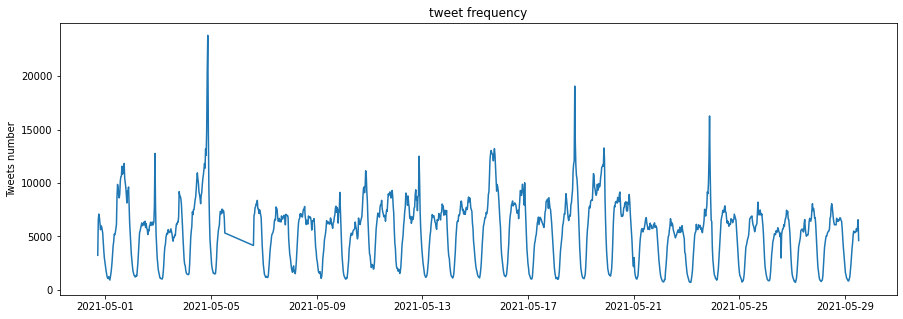

In [ ]:
import pyflux as pf

plt.figure(figsize=(15,5))
plt.plot(df_freq['time'],df_freq['Nombre de tweets'])
plt.ylabel('Tweets number')
plt.title('tweet frequency');

In [ ]:
#train_test_split


df_freq['time'] = pd.to_datetime(df_freq['time'])
train = df_freq['Nombre de tweets'].loc[(df_freq['time'] >= '2021-04-30 17:00:00') & (df_freq['time'] < '2021-05-13 14:00:00')]
train = pd.DataFrame(train)
train['nbtweet'] = train['Nombre de tweets']
del(train['Nombre de tweets'])

train

,nbtweet
0,3226
1,6549
2,7087
3,6781
4,6264
...,...
562,6330
563,6236
564,5812
565,5656


In [ ]:
test = df_freq.loc[(df_freq['time'] >= '2021-05-13 14:00:00') & (df_freq['time'] < '2021-05-29 10:00:00')]
test['nbtweet'] = test['Nombre de tweets']
del(test['Nombre de tweets'])
test['time'] =pd.to_datetime(test.time)
test

,time,nbtweet
567,2021-05-13 14:00:00+00:00,6459
568,2021-05-13 14:30:00+00:00,6529
569,2021-05-13 15:00:00+00:00,7135
570,2021-05-13 15:30:00+00:00,6931
571,2021-05-13 16:00:00+00:00,6910
...,...,...
1322,2021-05-29 07:30:00+00:00,5115
1323,2021-05-29 08:00:00+00:00,5501
1324,2021-05-29 08:30:00+00:00,5334
1325,2021-05-29 09:00:00+00:00,5398


In [ ]:
import statsmodels.api as sm
resDiff = sm.tsa.arma_order_select_ic(train, max_ar=9, max_ma=9, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [ ]:
from sklearn.preprocessing import RobustScaler



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['nbtweet']])

train['nbtweet'] = scaler.transform(train[['nbtweet']])
test['nbtweet'] = scaler.transform(test[['nbtweet']])

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
TIME_STEPS = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.nbtweet, TIME_STEPS)
X_test, y_test = create_dataset(test, test.nbtweet, TIME_STEPS)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(557, 10, 1) (557,)
(750, 10, 2) (750,)


In [ ]:
import pyflux as pf
model = pf.ARIMA(data=train, ar=5, ma=3, target="nbtweet", family=pf.Normal())

In [ ]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(5,0,3)                                                                                       
======================================================= ==================================================
Dependent Variable: nbtweet                             Method: MLE                                       
Start Date: 5                                           Log Likelihood: -81.839                           
End Date: 566                                           AIC: 183.678                                      
Number of observations: 562                             BIC: 226.9931                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0003     0.0029     0.1092   0.913    (-0.0053 | 0.006)        
AR(1)                                

In [ ]:
prediction = model.predict(h=563)
prediction

,nbtweet
567,0.465340
568,0.428887
569,0.431316
570,0.380339
571,0.378254
...,...
1125,0.009512
1126,0.008501
1127,0.009506
1128,0.008507


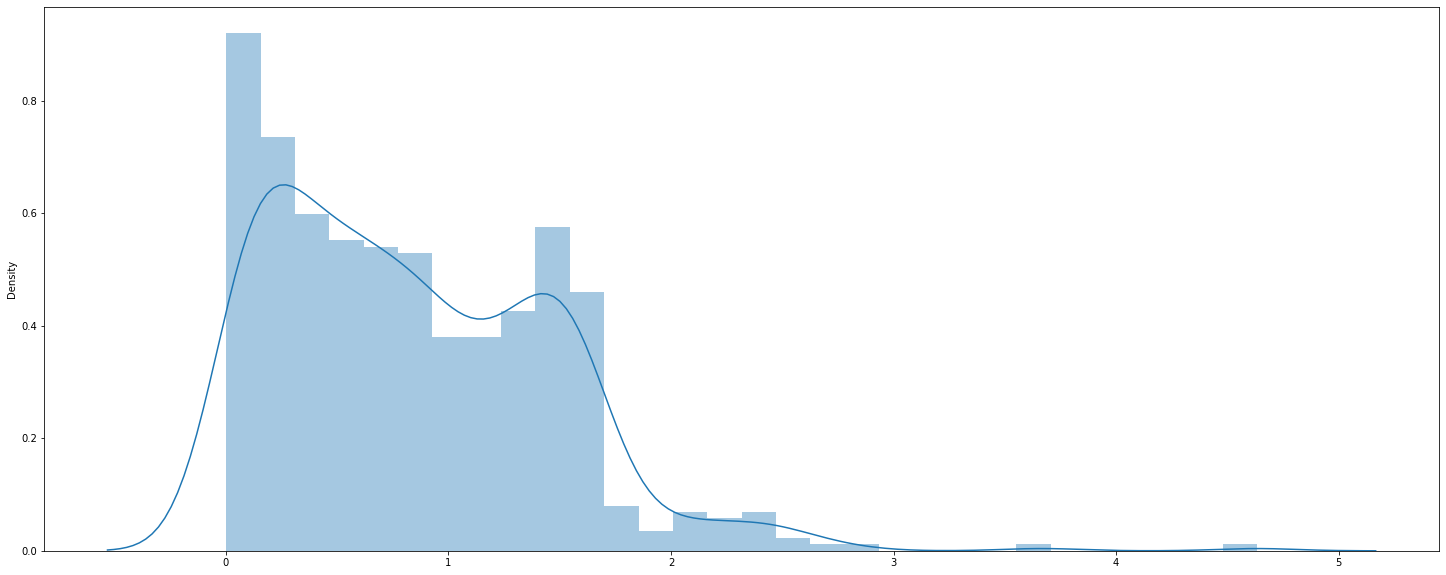

In [ ]:

test_mae_loss = np.mean(np.abs(prediction - test), axis=1)
plt.figure(figsize=(25,10))
sns.distplot(test_mae_loss, bins=30, kde=True);
test_mae_loss.plot

In [ ]:
THRESHOLD = 1.5

test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['time'] = test.time
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['nbtweet'] = test[TIME_STEPS:].nbtweet
test_score_df

,time,loss,threshold,anomaly,nbtweet
577,2021-05-13 19:00:00+00:00,0.624212,1.5,False,0.771620
578,2021-05-13 19:30:00+00:00,0.391191,1.5,False,0.474149
579,2021-05-13 20:00:00+00:00,0.420643,1.5,False,0.491384
580,2021-05-13 20:30:00+00:00,0.622792,1.5,False,0.633742
581,2021-05-13 21:00:00+00:00,0.595414,1.5,False,0.599273
...,...,...,...,...,...
1322,2021-05-29 07:30:00+00:00,NaN,1.5,False,-0.169049
1323,2021-05-29 08:00:00+00:00,NaN,1.5,False,-0.035997
1324,2021-05-29 08:30:00+00:00,NaN,1.5,False,-0.093561
1325,2021-05-29 09:00:00+00:00,NaN,1.5,False,-0.071501


In [ ]:

import plotly.express as px

fig = px.bar(test_score_df, x="time", y="loss")
fig.add_scatter(x=test_score_df['time'], y=test_score_df['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_df['time'], y=test_score_df['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies['nbtweet'] = scaler.inverse_transform(anomalies['nbtweet'])
anomalies['time'] =pd.to_datetime(anomalies.time)
anomalies.head(5)

,time,loss,threshold,anomaly,nbtweet
641,2021-05-15 03:00:00+00:00,1.523661,1.5,True,1205.0
642,2021-05-15 03:30:00+00:00,1.515591,1.5,True,1182.0
643,2021-05-15 04:00:00+00:00,1.558702,1.5,True,1111.0
661,2021-05-15 13:00:00+00:00,1.762677,1.5,True,10781.0
662,2021-05-15 13:30:00+00:00,2.271654,1.5,True,12212.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


trace1 = go.Scatter(x= test[TIME_STEPS:].time,
                        y=scaler.inverse_transform(test[TIME_STEPS:].nbtweet),
                        name='nbtweet',
                        mode='lines',
                        yaxis='y1',
                     marker_color='rgba(0, 0, 255, .8)')
trace2 = go.Scatter(x= anomalies.time,
                        y=anomalies.nbtweet,
                        name='anomalies',
                        mode='markers',
                        yaxis='y1',
                     marker_color='rgba(255, 0, 0, .8)')

data = [ trace1,trace2]
layout = go.Layout(title='Finding anomalies ',
          yaxis=dict(title='Frequency')
         
    )
          



go.Figure(data=data, layout=layout)
